In [179]:
import matplotlib.pyplot as plt
import numpy as np

from src.data import load_data

In [180]:
'''
Oct24_16-33-35_doc-dz819 - CNN - decoyMNIST
Oct24_16-45-12_doc-dz819 - CNN - MNIST
Oct24_16-02-48_doc-dz819 - RN18 - pneu_text
Oct24_17-16-51_doc-dz819 - RN18 - pneu_text
Oct24_17-24-57_doc-dz819 - RN18 - pneu
Oct24_17-30-23_doc-dz819 - RN18 (exit 2nd) - pneu
'''

model_dir = "Oct24_16-33-35_doc-dz819"
model = "CNN"
dataset = "decoyMNIST"

early = np.load(f"earlyExp_{model}_{dataset}_{model_dir}.npy")
late = np.load(f"lateExp_{model}_{dataset}_{model_dir}.npy")



In [181]:
early.shape

(10000, 1, 28, 28)

In [182]:
seed = 0
frac = 1.0
data_raw = load_data(data=dataset, split='test', seed=seed, frac=frac)

In [183]:
ent_early = np.load(f"earlyEnt_{model}_{dataset}_{model_dir}.npy")
ent_late = np.load(f"lateEnt_{model}_{dataset}_{model_dir}.npy")


<Figure size 640x480 with 0 Axes>

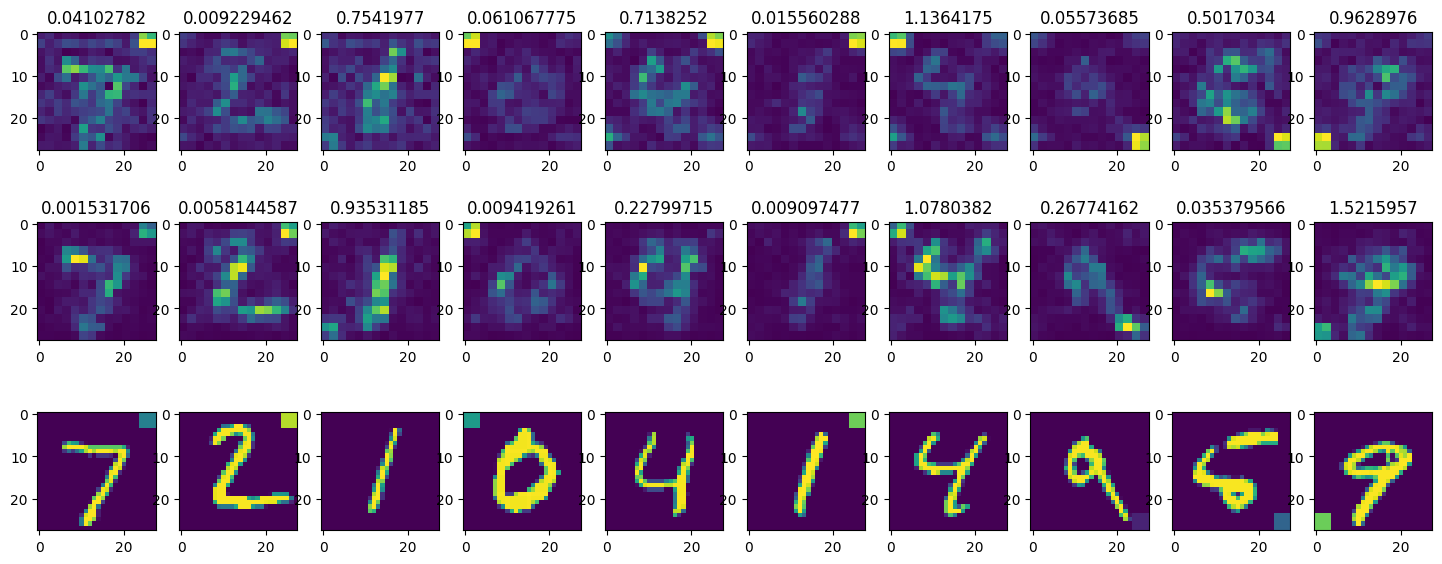

In [184]:
plt.figure()
fig, axs = plt.subplots(3,10, figsize=(18,7))

for i in range(10):
    axs[0][i].imshow(early[i].sum(axis=0))
    axs[0][i].set_title(ent_early[i])

    axs[1][i].imshow(late[i].sum(axis=0))
    axs[1][i].set_title(ent_late[i])

    axs[2][i].imshow(data_raw[i][0].sum(axis=0), vmin=0)

    # axs[2][i].imshow(data[i].sum(axis=0), vmin=0)



In [185]:
import torch

probs = torch.Tensor([0.1 for i in range(10)])
# probs = torch.Tensor([0.05 for i in range(9)]+[1-9*0.05])
probs = torch.Tensor([0.0980, 0.1350, 0.0729, 0.1517, 0.0761, 0.1135, 0.0768, 0.0853, 0.0774,
        0.1134])
log_probs = probs.log()
ent = (-probs*log_probs).sum(dim=-1)
ent

tensor(2.2699)